# I. EXPLORATORY DATA ANALYSIS(EDA)

## 1. Surpress warning and import necessary libiraries

In [45]:
import warnings
warnings.filterwarnings('ignore')

Necessary libraries:
* **pandas**: for managing data and Dataframe
* **numpy**: for mathematical calculations
* **seaborn**: for data visulaization
* **matplotlib**: for data visualization
* **sklearn**: for Machine Learning and related functions

In [46]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE

## 2. Import dataset

In [ ]:
url = "Data/winequality-red.csv"
df = pd.read_csv(url)
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## 3. Check for dataset statistical description

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [49]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [50]:
df['quality'].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


## 4. Check for null

In [51]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


There is no null value in this dataset, so we can surpass this phase

## 5. Visualization

### 5.1. Histogram of 11 features

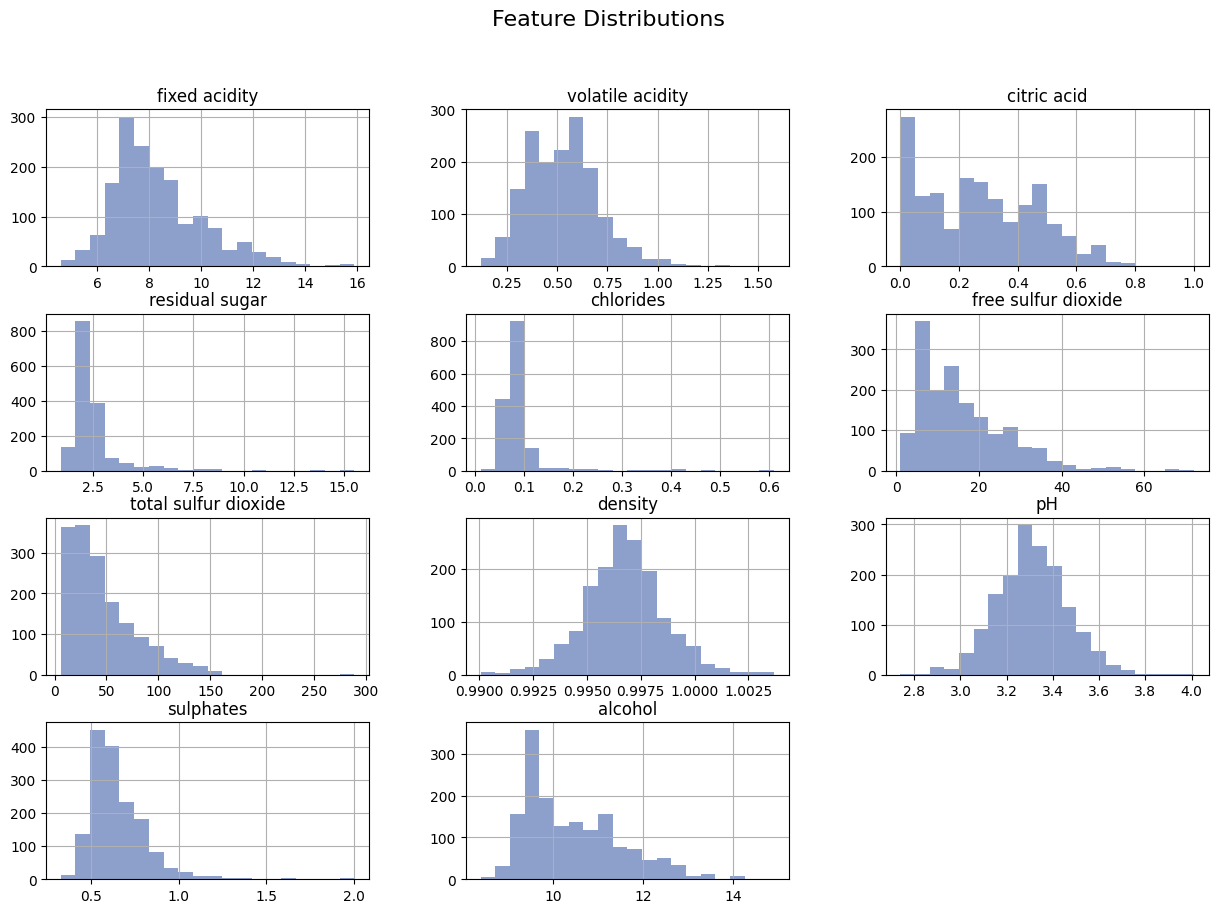

In [52]:
df.drop(columns='quality').hist(bins=20, figsize=(15,10), color="#8DA0CB")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

### 5.2. Distribution of Wine Quality Scores

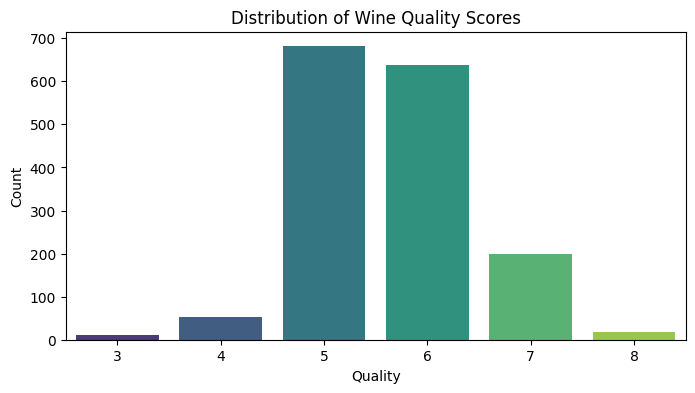

In [53]:
plt.figure(figsize=(8,4))
sns.countplot(x="quality", data=df, palette="viridis")
plt.title("Distribution of Wine Quality Scores")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

### 5.3. Heatmap of correlation

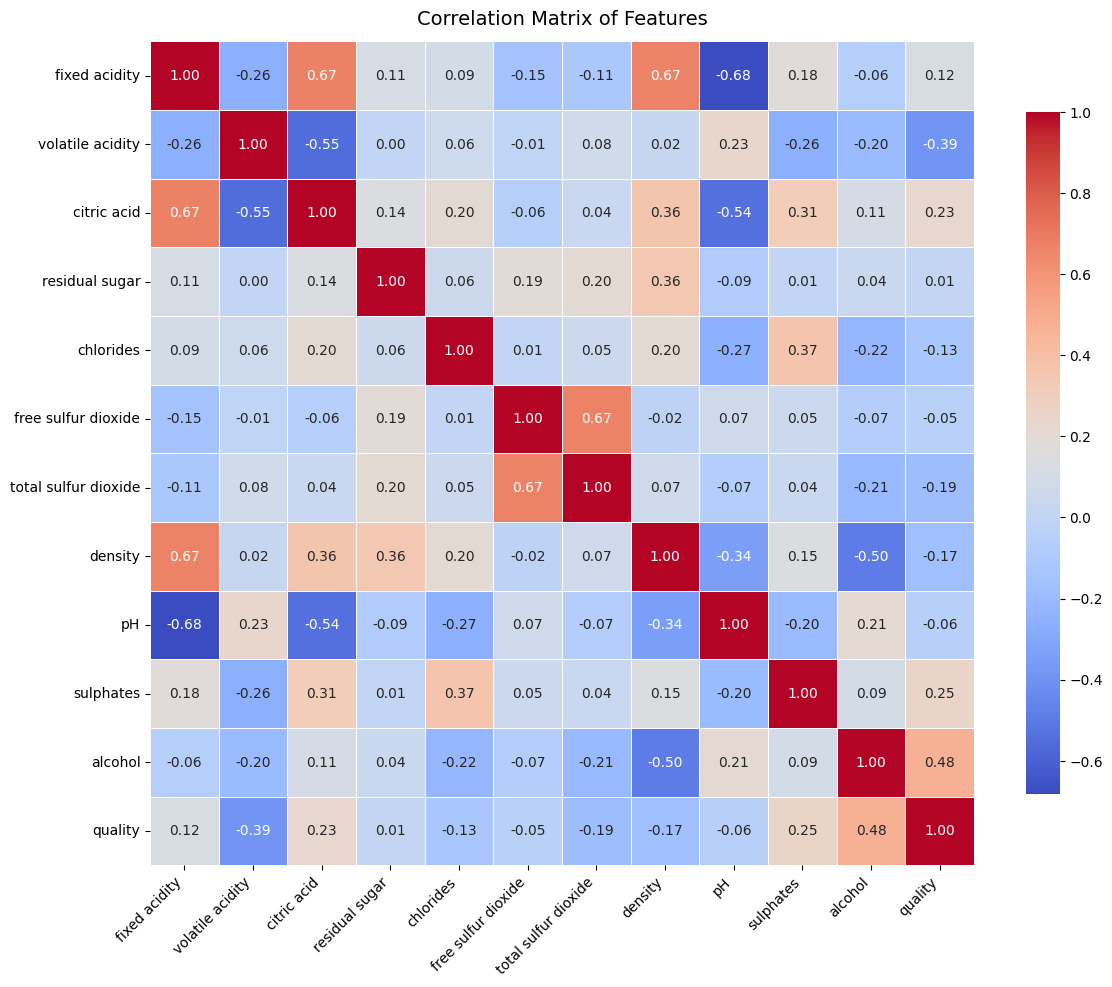

In [54]:
plt.figure(figsize=(12,10))
sns.heatmap(
    df.corr(),
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Matrix of Features", fontsize=14, pad=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### 5.4. Pairwise relationships of features

In [56]:
sns.pairplot(df, vars=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'], hue="quality", palette="coolwarm")
plt.show()


Output hidden; open in https://colab.research.google.com to view.

### 5.5. Correlation of features with Quality

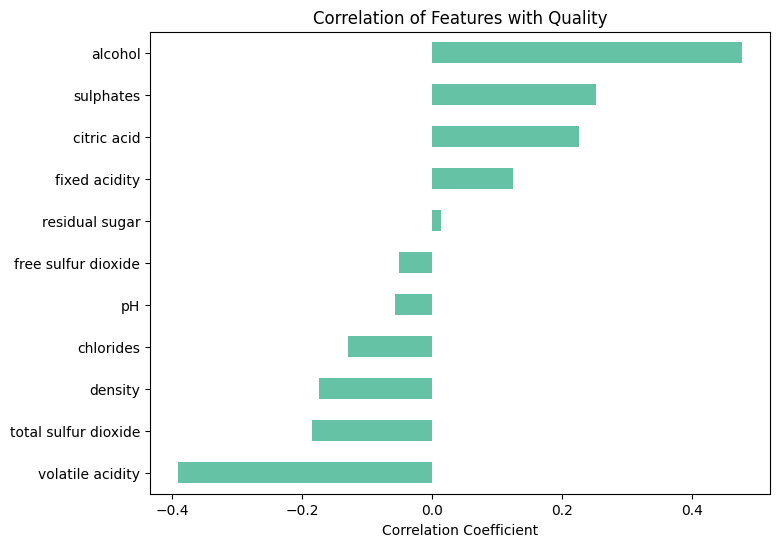

In [57]:
corr = df.corr()["quality"].drop("quality").sort_values()
plt.figure(figsize=(8,6))
corr.plot(kind="barh", color="#66C2A5")
plt.title("Correlation of Features with Quality")
plt.xlabel("Correlation Coefficient")
plt.show()


### 5.6. Box Plot of some typical feature vs Quality

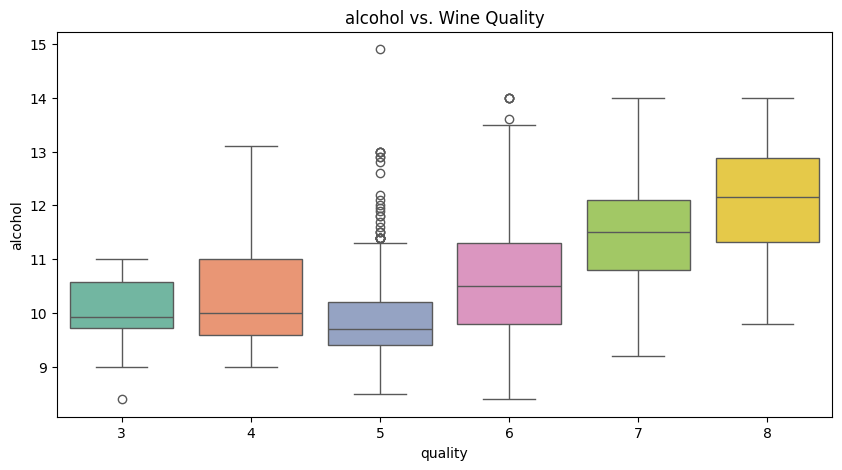

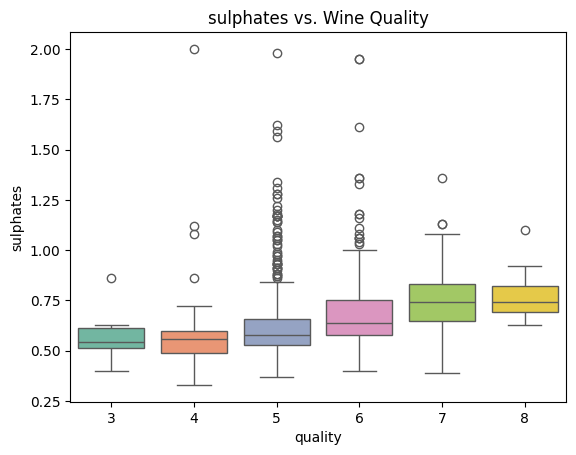

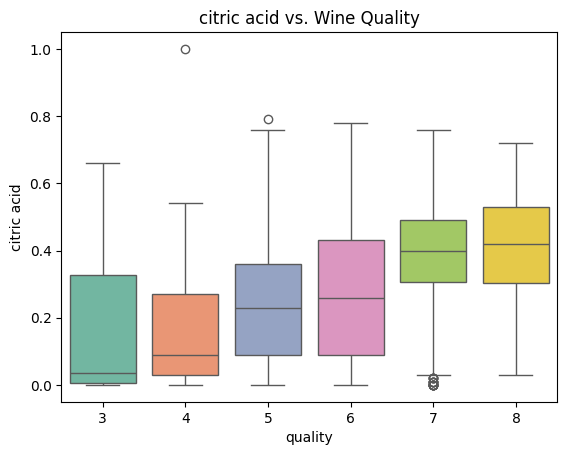

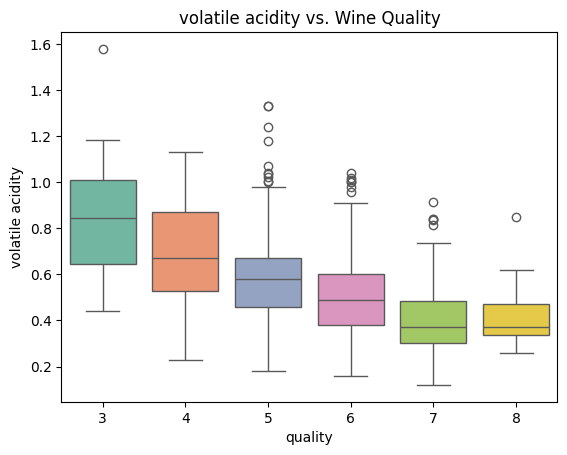

In [72]:
plt.figure(figsize=(10,5))
best_corr = ["alcohol", "sulphates", "citric acid","volatile acidity"]
for feature in best_corr:
  sns.boxplot(x="quality", y=feature, data=df, palette="Set2")
  plt.title(f"{feature} vs. Wine Quality")
  plt.show()


##  6. Remove outliers

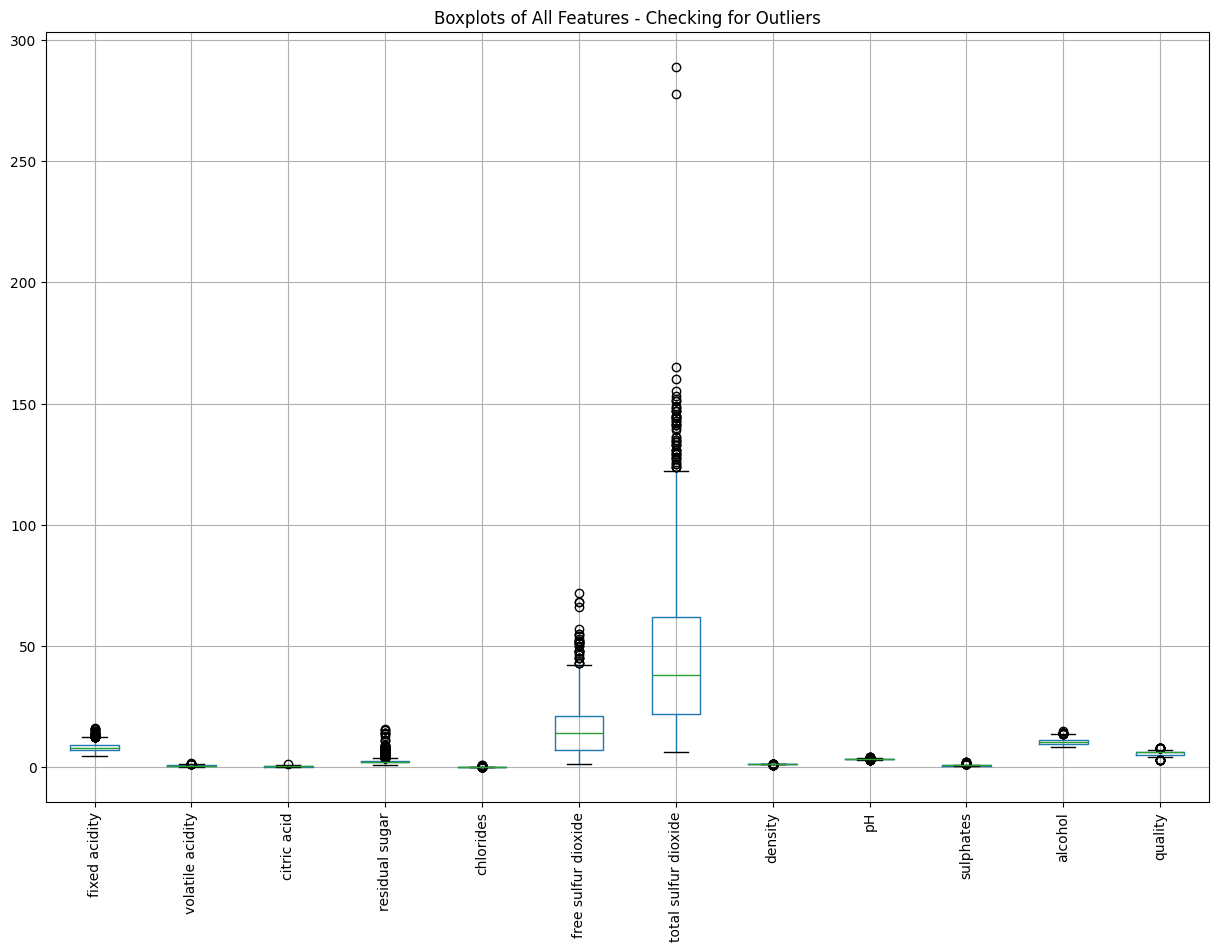

Number of outliers per feature (excluding target):
residual sugar          155
chlorides               112
sulphates                59
total sulfur dioxide     55
fixed acidity            49
density                  45
pH                       35
free sulfur dioxide      30
volatile acidity         19
alcohol                  13
citric acid               1
dtype: int64

Original shape: (1599, 12)
After removing outliers (features only): (1194, 12)

Class distribution before cleaning:
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

Class distribution after cleaning:
quality
3      3
4     33
5    513
6    498
7    135
8     12
Name: count, dtype: int64


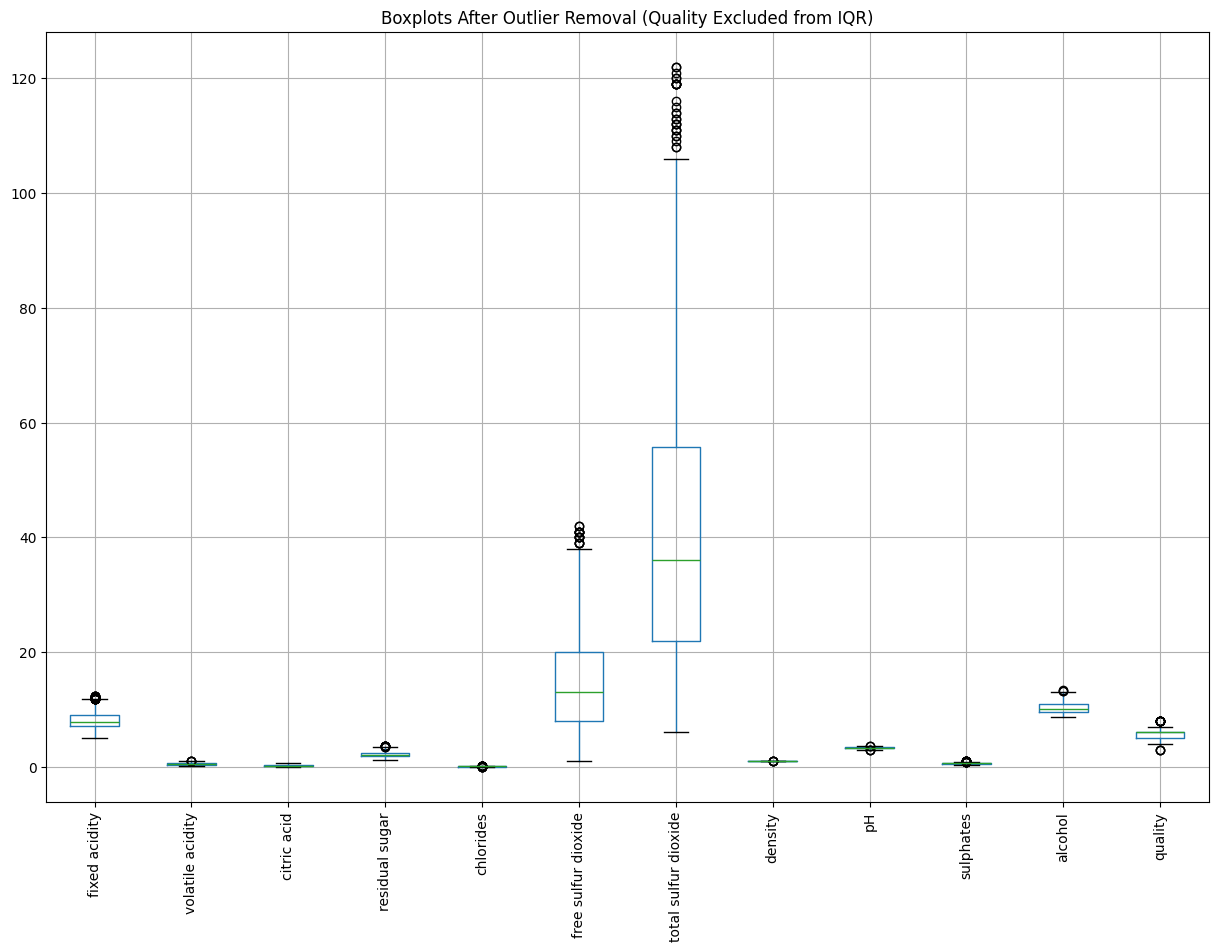

In [59]:
# 1Visual Inspection of Outliers using Boxplots (all features)
plt.figure(figsize=(15, 10))
df.boxplot(rot=90)
plt.title("Boxplots of All Features - Checking for Outliers")
plt.show()

# Exclude target column from outlier detection
X = df.drop(columns=['quality'])
y = df['quality']

# Detect Outliers using IQR (Interquartile Range)
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5  # 1.5 = standard, 3 = less aggressive
outlier_mask = ((X < (Q1 - threshold * IQR)) | (X > (Q3 + threshold * IQR)))

# Count number of outliers per column
outlier_counts = outlier_mask.sum().sort_values(ascending=False)
print("Number of outliers per feature (excluding target):")
print(outlier_counts)

# Remove rows with outliers in any feature
df_clean = df[~outlier_mask.any(axis=1)]

print(f"\nOriginal shape: {df.shape}")
print(f"After removing outliers (features only): {df_clean.shape}")

# Check class distribution before & after
print("\nClass distribution before cleaning:")
print(df['quality'].value_counts().sort_index())
print("\nClass distribution after cleaning:")
print(df_clean['quality'].value_counts().sort_index())

# Visualize After Cleaning
plt.figure(figsize=(15, 10))
df_clean.boxplot(rot=90)
plt.title("Boxplots After Outlier Removal (Quality Excluded from IQR)")
plt.show()


## 7. Scaling

In [63]:
# Split features and target features
X = df_clean.drop(columns=["quality"])
y = df_clean["quality"]

# Standardize X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Recombine DataFrame, quality column remains unchanged
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled["quality"] = y.values

# Check
df_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.524869,1.075573,-1.377452,-0.646558,-0.173311,-0.454417,-0.312763,0.766056,1.408196,-0.621576,-0.989805,5
1,-0.250994,2.167738,-1.377452,0.937243,1.365747,1.133715,0.952872,0.142508,-0.938945,0.411596,-0.579638,5
2,-0.250994,1.439628,-1.155393,0.258471,0.946004,-0.000665,0.454289,0.267217,-0.484660,0.153303,-0.579638,5
3,2.076938,-1.472812,1.731370,-0.646558,-0.243268,0.226211,0.684404,0.890766,-1.241802,-0.449381,-0.579638,6
4,-0.524869,1.075573,-1.377452,-0.646558,-0.173311,-0.454417,-0.312763,0.766056,1.408196,-0.621576,-0.989805,5


In [ ]:
df_scaled.to_csv("Data/Wine_clean.csv")

## 8. Define X and Y

### 7.1 Define X

In [65]:
# X for regression and classification
X_scaled = df_clean.drop('quality', axis=1)

### 7.2. Y for regression

In [66]:
# y for regression
y_reg = df_clean['quality']

### 7.3. Y for classification

In [67]:
# y for classification
y_clf = np.where(df_clean['quality'] >= 7, 1, 0)  # 1=good, 0=bad

In [68]:
# Split train and test set

X_train, X_test, y_train_reg, y_test_reg = train_test_split(
    X_scaled, y_reg, test_size=0.2, random_state=42
)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_scaled, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)


In [69]:
# Calculate classes in quality column
print(Counter(y_clf))

Counter({np.int64(0): 1047, np.int64(1): 147})


In [70]:
# Apply resampling
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_c, y_train_c)

In [71]:
# Recheck for classes
print(Counter(y_train_sm))

Counter({np.int64(0): 837, np.int64(1): 837})
